# notebook to parse the HBN dx csv into a 1 hot encoding of dx presence/absence

In [1]:
import numpy as np
import pandas as pd
import re
import math
from matplotlib import pyplot as plt


In [2]:
#dx_file = '../sourcedata/data/HBN/phenotype/consensusDX_data-2021-06-01T18_41_14.276Z.csv'
dx_file = '../sourcedata/data/HBN/phenotype/Diagnosis_ClinicianConsensus_data-2021-07-28T01_17_37.720Z.csv'


In [3]:
#dx = pd.read_csv(dx_file,skipfooter=6)
dx = pd.read_csv(dx_file)

dx.columns = ['id','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10']

In [4]:
dx[-5:]

,id,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
3610,"NDARZZ284ZDH,assessment",Autism Spectrum Disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3611,"NDARZZ740MLM,assessment",ADHD-Inattentive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3612,"NDARZZ810LVF,assessment",Autism Spectrum Disorder,Language Disorder,Tourettes Disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3613,"NDARZZ830JM7,assessment",Obsessive-Compulsive Disorder,Autism Spectrum Disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3614,"NDARZZ993CEV,assessment",Generalized Anxiety Disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
sub_list = dx.id.tolist()
sub_list = [elem[:12] for elem in sub_list]

In [6]:
len(sub_list)

3615

## get a list of all possible dx

In [7]:
all_dx = []
for i,column in enumerate(dx):
    if i==0:
        continue
    all_dx.append(dx[column].tolist())
all_dx = [item for sublist in all_dx for item in sublist]
all_dx = np.unique(np.array(all_dx))
all_dx = all_dx[1:-1]
all_dx = all_dx.tolist()
all_dx[0:10]

['ADHD-Combined Type',
 'ADHD-Hyperactive/Impulsive Type',
 'ADHD-Inattentive Type',
 'Acute Stress Disorder',
 'Adjustment Disorders',
 'Agoraphobia',
 'Alcohol Use Disorder',
 'Anorexia Nervosa-Binge Eating/Purging Type',
 'Anorexia Nervosa-Restricting Type',
 'Autism Spectrum Disorder']

In [8]:
all_dx.index('Unspecified Neurodevelopmental Disorder')

103

In [9]:
#subject by dx array
dx_array = np.zeros( (dx.shape[0],len(all_dx) ))

In [10]:
#LOOP THROUGH columns
for i,column in enumerate(dx):
    if i==0:
        continue
    for ii,d in enumerate(dx[column]):
        #print(i,ii,d)
        if not isinstance(d, str):
            if math.isnan(d):
                continue
        if not bool(re.match(d,' ')):
            dx_array[ii,all_dx.index(d)]=1

In [11]:
dx_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
np.save('../sourcedata/data/HBN/phenotype/parsed/dx_list.npy',all_dx)
np.save('../sourcedata/data/HBN/phenotype/parsed/sub_list.npy',sub_list)
np.save('../sourcedata/data/HBN/phenotype/parsed/dx_onehot.npy',dx_array)

In [14]:
dx_df = pd.DataFrame(dx_array)
dx_df.columns = all_dx
dx_df

,ADHD-Combined Type,ADHD-Hyperactive/Impulsive Type,ADHD-Inattentive Type,Acute Stress Disorder,Adjustment Disorders,Agoraphobia,Alcohol Use Disorder,Anorexia Nervosa-Binge Eating/Purging Type,Anorexia Nervosa-Restricting Type,Autism Spectrum Disorder,...,Tourettes Disorder,Trichotillomania (Hair-Pulling Disorder),Unspecified Anxiety Disorder,Unspecified Attention-Deficit/Hyperactivity Disorder,Unspecified Bipolar and Related Disorder,Unspecified Depressive Disorder,Unspecified Intellectual Disability,Unspecified Neurodevelopmental Disorder,Unspecified Tic Disorder,Unspecified Trauma- and Stressor-Related Disorder
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3611,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
dx_df.to_pickle('../sourcedata/data/HBN/phenotype/parsed/dx_onehot_df.pkl')
#unpickled_df = pd.read_pickle("./dummy.pkl")

In [16]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(dx_array)


In [17]:
embedding.shape

(3615, 2)

In [18]:
from matplotlib import pyplot as plt

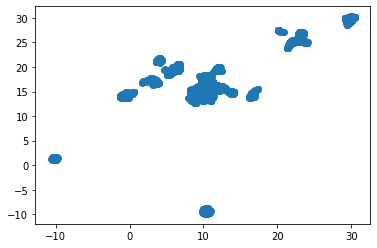

In [19]:
plt.scatter(embedding[:,0],embedding[:,1])

In [ ]:
dx_df = pd.read_pickle('../sourcedata/data/HBN/phenotype/parsed/dx_onehot_df.pkl')

In [35]:

print('32 participants with ONLY language disorder:')
#dx_df.loc[ (dx_df['Language Disorder'] == 1) & (dx_df.drop('Language Disorder',axis=1).eq(0).all(1)) ]

32 participants with ONLY language disorder:


In [32]:
dx_sum_lang = dx_df.loc[dx_df['Language Disorder'] == 1].sum()
print('comorbid w/langauge disorder:')
print(dx_sum_lang.to_string())

comorbid w/langauge disorder:
ADHD-Combined Type                                                              118.0
ADHD-Hyperactive/Impulsive Type                                                   8.0
ADHD-Inattentive Type                                                           111.0
Acute Stress Disorder                                                             0.0
Adjustment Disorders                                                             10.0
Agoraphobia                                                                       6.0
Alcohol Use Disorder                                                              0.0
Anorexia Nervosa-Binge Eating/Purging Type                                        0.0
Anorexia Nervosa-Restricting Type                                                 0.0
Autism Spectrum Disorder                                                         69.0
Avoidant/Restrictive Food Intake Disorder                                         0.0
Binge-Eating Disorder   

In [16]:
dx_sum = dx_df.sum()

In [17]:
print(dx_sum.to_string())

ADHD-Combined Type                                                              892.0
ADHD-Hyperactive/Impulsive Type                                                 106.0
ADHD-Inattentive Type                                                           832.0
Acute Stress Disorder                                                             3.0
Adjustment Disorders                                                             82.0
Agoraphobia                                                                      19.0
Alcohol Use Disorder                                                              5.0
Anorexia Nervosa-Binge Eating/Purging Type                                        1.0
Anorexia Nervosa-Restricting Type                                                 4.0
Autism Spectrum Disorder                                                        539.0
Avoidant/Restrictive Food Intake Disorder                                         6.0
Binge-Eating Disorder                                 

In [34]:
dx_name_list = []
dx_val_list = []
for i,n in enumerate(dx_sum):
    if n>0:
        dx_name_list.append(dx_sum.index[i])
        dx_val_list.append(n)

In [31]:
dx_val_list

[892.0,
 106.0,
 832.0,
 82.0,
 19.0,
 539.0,
 38.0,
 23.0,
 16.0,
 20.0,
 35.0,
 50.0,
 63.0,
 246.0,
 36.0,
 447.0,
 75.0,
 14.0,
 17.0,
 412.0,
 198.0,
 308.0,
 450.0,
 94.0,
 448.0,
 158.0,
 143.0,
 39.0,
 18.0,
 14.0,
 30.0,
 17.0,
 98.0,
 69.0,
 38.0,
 58.0,
 18.0,
 188.0,
 32.0,
 309.0,
 259.0,
 547.0,
 174.0,
 284.0,
 87.0,
 55.0,
 14.0,
 16.0]

In [36]:
x=np.arange(len(dx_val_list))

Text(0.5, 1.0, 'HBN ConsensusDx n > 10')

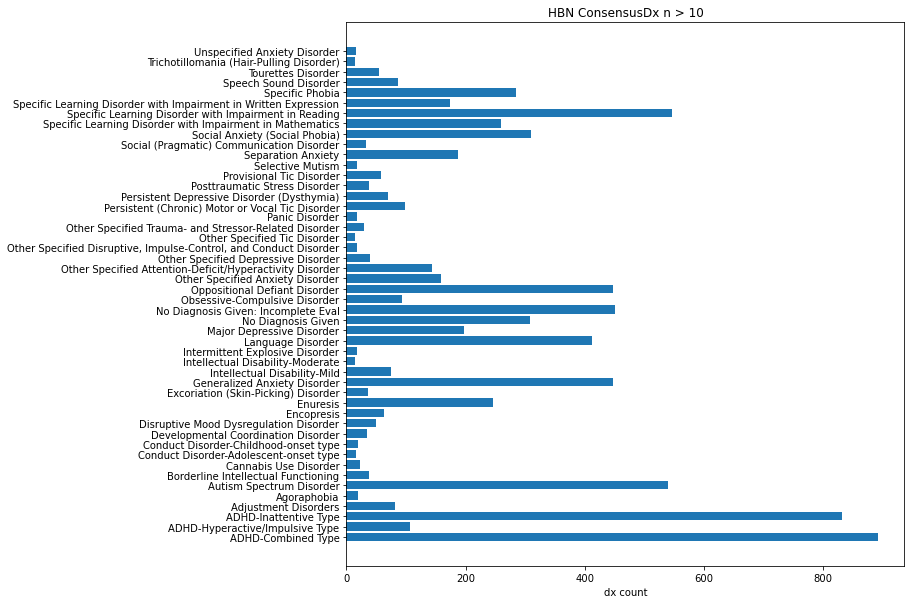

In [33]:
plt.figure(figsize=(10, 10),facecolor='white')
plt.xlabel('dx count')

plt.barh(x,dx_val_list,tick_label=dx_name_list)
plt.title('HBN ConsensusDx n > 10')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105]),
 [Text(0, 0, 'ADHD-Combined Type'),
  Text(1, 0, 'ADHD-Hyperactive/Impulsive Type'),
  Text(2, 0, 'ADHD-Inattentive Type'),
  Text(3, 0, 'Acute Stress Disorder'),
  Text(4, 0, 'Adjustment Disorders'),
  Text(5, 0, 'Agoraphobia'),
  Text(6, 0, 'Alcohol Use Disorder'),
  Text(7, 0, 'Anorexia Nervosa-Binge Eating/Purging Type'),
  Text(8, 0, 'Anorexia Nervosa-Restricting Type'),
  Text(9, 0, 'Aut

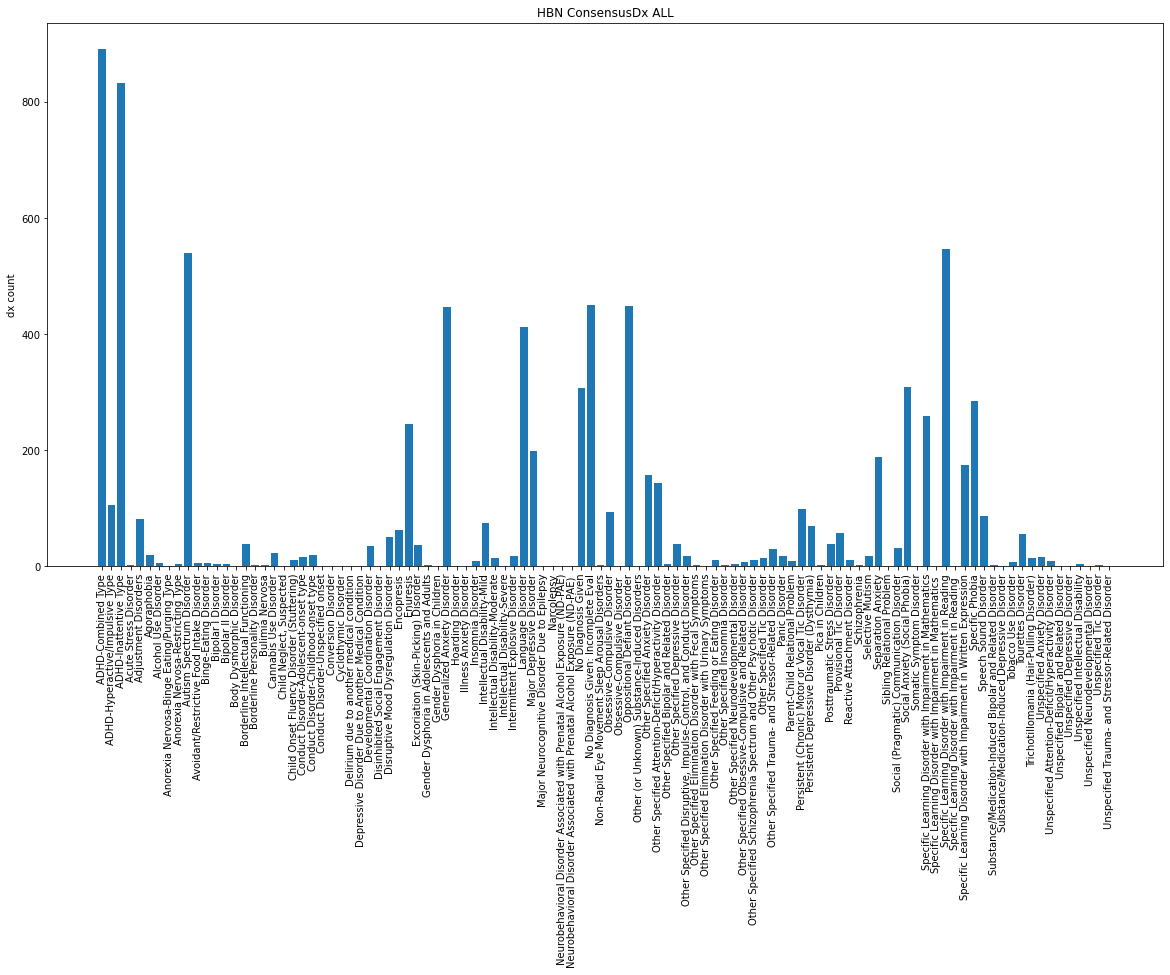

In [37]:
plt.figure(figsize=(20, 10),facecolor='white')
plt.ylabel('dx count')

plt.bar(x,dx_val_list,tick_label=dx_name_list)
plt.title('HBN ConsensusDx ALL')
plt.xticks(rotation=90)